In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix 
import scikitplot as skplt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import warnings
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')

warnings.filterwarnings('ignore')

In [65]:
bank_data = pd.read_csv('../../dataset/BankChurners.csv')
bank_data = bank_data[bank_data.columns[:-2]]
bank_data.head()
# bank_data.describe()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [76]:
# modified data description
print(bank_data.shape)
print(bank_data.isnull().values.sum())
print('**-----------------------------------------------------------------**')

# count the number of values for each column feature
categories = dict()
for col in bank_data.columns: 
    if bank_data[col].dtype == 'object':
        categories[col] = bank_data[col].unique()
# print(categories.keys())

for col in categories.keys():
    print(col)
    print(bank_data[col].value_counts())

print('**-----------------------------------------------------------------**')
print(bank_data.loc[0])

(10127, 21)
0
**-----------------------------------------------------------------**
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
Gender
F    5358
M    4769
Name: Gender, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
**-----------------------------------------------------------------**
CLIENTNUM                           768805383
Attrition_Flag

In [41]:
# categorical features transformed
# bank_data['Attrition_Flag'] = bank_data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)
bank_data['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}, inplace=True)
bank_data['Gender'].replace({'M':1, 'F':0}, inplace=True)
bank_data['Education_Level'].replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 
                                                                        'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}, inplace=True)
bank_data['Marital_Status'].replace({'Unknown':0, 'Divorced':1, 'Married':2, 'Single':3}, inplace=True)
bank_data['Income_Category'].replace({'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3,
                                                                       '$80K - $120K':4, '$120K +':5}, inplace=True)
bank_data['Card_Category'].replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}, inplace=True)

bank_data.head()

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               0            45       1                3   
1  818770008               0            49       0                5   
2  713982108               0            51       1                3   
3  769911858               0            40       0                4   
4  709106358               0            40       1                3   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                2               2                3              0   
1                4               3                1              0   
2                4               2                4              0   
3                2               0                1              0   
4                1               2                3              0   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

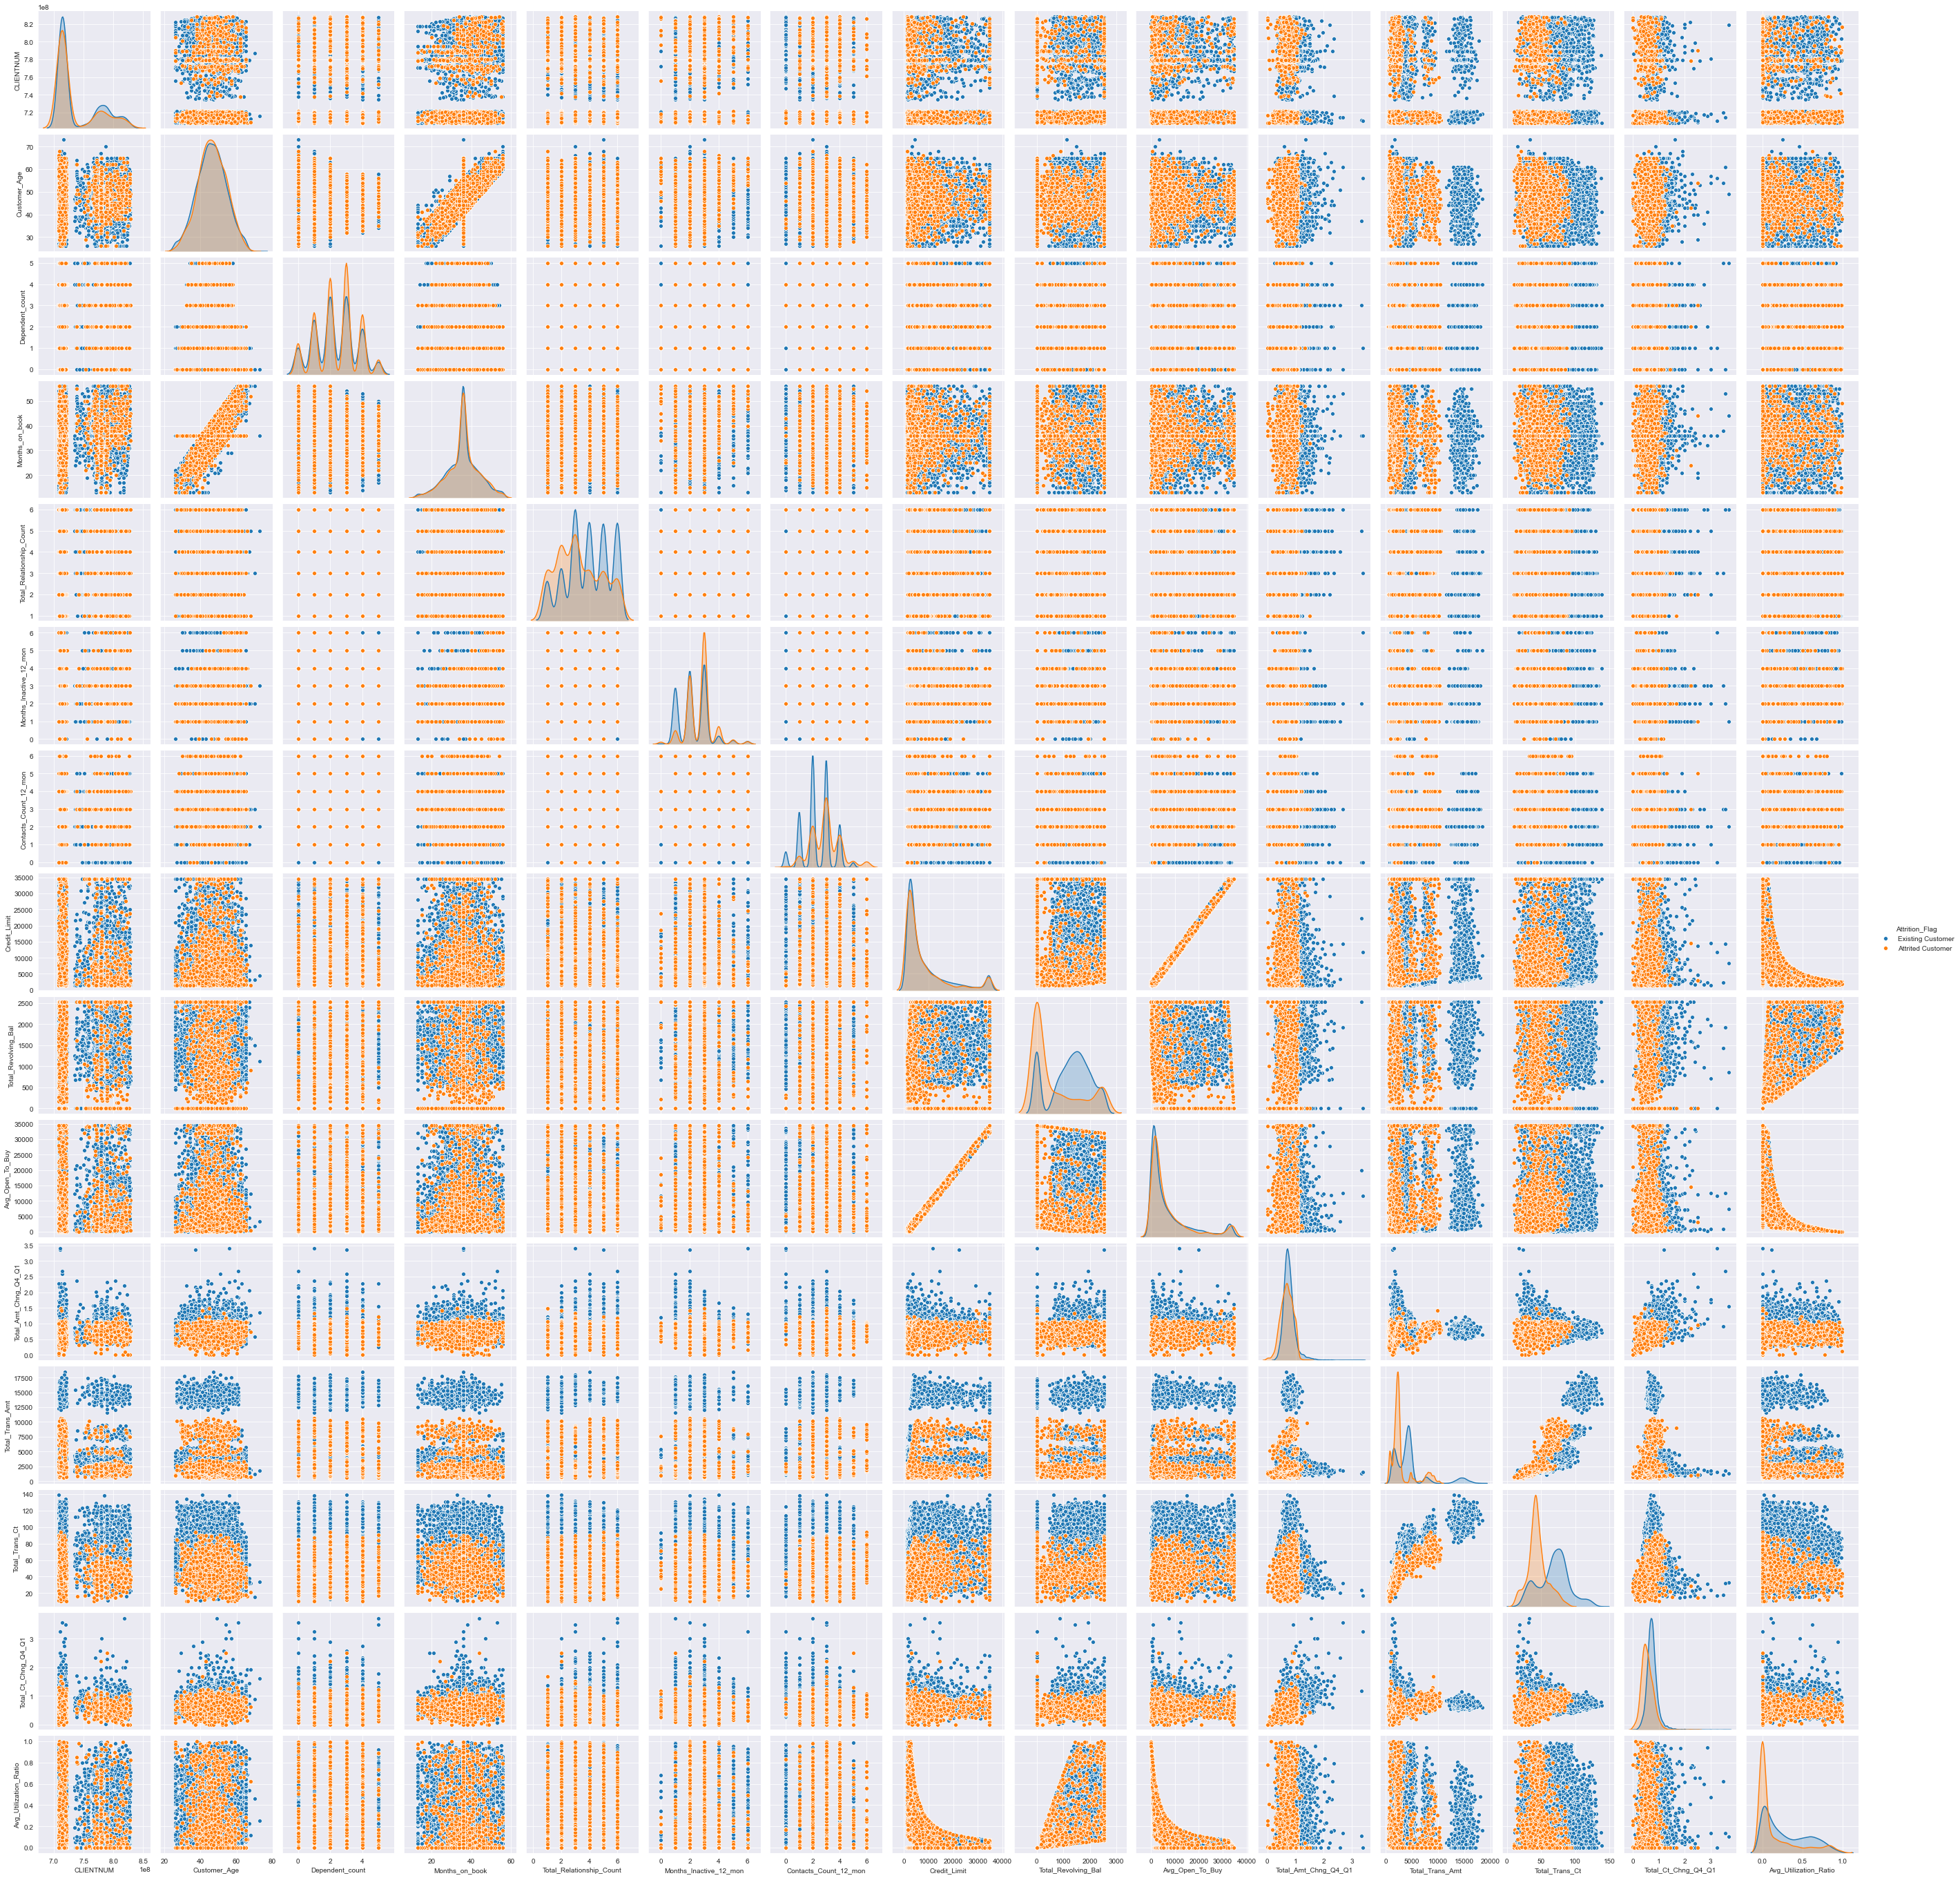

In [77]:
# plot figure
sns.pairplot(bank_data, hue='Attrition_Flag')